In [7]:
# Jupyter was having some issues generating graph labels, so I generated the graphs in a script

import pandas as pd
import numpy as np
import geopy.distance
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime

def str_to_date(string):
    return datetime.strptime(string, "%Y-%m-%dT%H:%M:%S")

df = pd.read_csv("metro-bike-share-trip-data.csv")

station_start = {}
station_end = {}

def increm_dict(dictionary, key):
    if key != np.nan:
        if key in dictionary:
            dictionary[key][0] += 1
        else:
            dictionary[key] = [1, "2022-07-07T04:17:00", "2011-07-07T04:17:00"] # Arbitrary ISO later/earlier than all dates in data set

sanitized_df = df.dropna(subset=["Starting Station ID", "Ending Station ID", 'Start Time', 'End Time'])
for _, row in sanitized_df.iterrows():
    increm_dict(station_start, row["Starting Station ID"])
    increm_dict(station_end, row["Ending Station ID"])
    if row["Start Time"] < station_start[row["Starting Station ID"]][1]:
        station_start[row["Starting Station ID"]][1] =  row["Start Time"]
    if row["Start Time"] < station_end[row["Ending Station ID"]][1]:
        station_end[row["Ending Station ID"]][1] =  row["Start Time"]
    if row["End Time"] > station_start[row["Starting Station ID"]][2]:
        station_start[row["Starting Station ID"]][2] = row["End Time"]
    if row["End Time"] > station_end[row["Ending Station ID"]][2]:
        station_end[row["Ending Station ID"]][2] = row["End Time"]

station_start = {k: v[0] / ((str_to_date(v[2]) - str_to_date(v[1])).days) for k, v in station_start.items()} # Normalize over number of days
station_end = {k: v[0] / ((str_to_date(v[2]) - str_to_date(v[1])).days) for k, v in station_end.items()}

end_pairs = list(station_end.items())
end_pairs.sort(key=lambda x: x[1], reverse=True)
total_ends = 0
for pair in end_pairs:
    total_ends += pair[1]
end_pairs = list(map(lambda x: (x[0], x[1], x[1] / total_ends), end_pairs))
endings = set(map(lambda x: x[0], end_pairs[:10]))
hist_end = list(map(lambda x: x[1], end_pairs))
start_pairs = list(station_start.items())
start_pairs.sort(key=lambda x: x[1], reverse=True)
total_starts = 0
for pair in end_pairs:
    total_starts += pair[1]
start_pairs = list(map(lambda x: (x[0], x[1], x[1] / total_starts), start_pairs))
starts = set(map(lambda x: x[0], start_pairs[:10]))
hist_start = list(map(lambda x: x[1], start_pairs)

SyntaxError: unexpected EOF while parsing (<ipython-input-7-5f2ca39601c8>, line 56)

In [5]:
# Print top 5
print(start_pairs[:5])
print(end_pairs[:5])

# Calculate overlap of top 10
print(starts.intersection(endings))

[(3021.0, 24.115384615384617, 0.04428772820822013), (3069.0, 19.304511278195488, 0.03545259436317749), (3030.0, 18.94007490636704, 0.034783309620589085), (3005.0, 18.280898876404493, 0.033572737642494625), (3082.0, 18.247663551401867, 0.03351170121018787)]
[(3021.0, 28.653846153846153, 0.052622579768937784), (3005.0, 23.45318352059925, 0.04307160072061081), (3082.0, 21.976635514018692, 0.040359931060566866), (3031.0, 20.662921348314608, 0.03794730456333597), (3014.0, 20.164794007490638, 0.037032497329889585)]
{3042.0, 3014.0, 3082.0, 3021.0, 3022.0, 3005.0, 3030.0, 3031.0, 3064.0, 3069.0}


In [33]:
daily_usage = {}
sanitized_df = df.dropna(subset=["Passholder Type", 'Start Time']) 

def increm_day(day):
    for day_k in daily_usage.keys():
        if abs((day - day_k).days) <= 3:
            daily_usage[day_k] += 1
            break
    else:
        daily_usage[day] = 1

def str_to_date(string):
    return datetime.strptime(string, "%Y-%m-%d")

for _, row in sanitized_df.iterrows():
    if row["Passholder Type"] in {"Monthly Pass", "Flex Pass", "Staff Annual"}:
        day = str_to_date(row["Start Time"].split("T")[0]) # We only care about the day
        increm_day(day)

In [34]:
mean(daily_usage.values())

1361.2388059701493

In [35]:
from statistics import stdev
stdev(daily_usage.values())

413.8784439301808

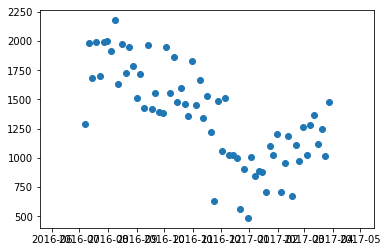

In [36]:
plt.scatter(daily_usage.keys(), daily_usage.values())

In [37]:
daily_usage

{datetime.datetime(2016, 7, 7, 0, 0): 1288,
 datetime.datetime(2016, 7, 11, 0, 0): 1986,
 datetime.datetime(2016, 7, 15, 0, 0): 1683,
 datetime.datetime(2016, 7, 19, 0, 0): 1993,
 datetime.datetime(2016, 7, 23, 0, 0): 1703,
 datetime.datetime(2016, 7, 27, 0, 0): 1994,
 datetime.datetime(2016, 7, 31, 0, 0): 2002,
 datetime.datetime(2016, 8, 4, 0, 0): 1915,
 datetime.datetime(2016, 8, 8, 0, 0): 2178,
 datetime.datetime(2016, 8, 12, 0, 0): 1632,
 datetime.datetime(2016, 8, 16, 0, 0): 1973,
 datetime.datetime(2016, 8, 20, 0, 0): 1724,
 datetime.datetime(2016, 8, 24, 0, 0): 1947,
 datetime.datetime(2016, 8, 28, 0, 0): 1783,
 datetime.datetime(2016, 9, 1, 0, 0): 1509,
 datetime.datetime(2016, 9, 5, 0, 0): 1714,
 datetime.datetime(2016, 9, 9, 0, 0): 1430,
 datetime.datetime(2016, 9, 13, 0, 0): 1968,
 datetime.datetime(2016, 9, 17, 0, 0): 1414,
 datetime.datetime(2016, 9, 21, 0, 0): 1558,
 datetime.datetime(2016, 9, 25, 0, 0): 1392,
 datetime.datetime(2016, 9, 29, 0, 0): 1382,
 datetime.dateti

In [31]:
(datetime(2016, 7, 7, 0, 0) - datetime(2016, 7, 8, 0, 0)).days

-1

In [52]:
weekday_usage = {}
sanitized_df = df.dropna(subset=['Start Time']) 

def increm_weekday(day, amount):
    if day in weekday_usage:
        weekday_usage[day] += amount
    else:
        weekday_usage[day] = amount

def str_to_date(string):
    return datetime.strptime(string, "%Y-%m-%d")

for _, row in sanitized_df.iterrows():
#     if row["Passholder Type"] in {"Monthly Pass", "Flex Pass", "Staff Annual"}:
    day = str_to_date(row["Start Time"].split("T")[0]) # We only care about the day
    increm_weekday(day.weekday(), row["Duration"])

In [53]:
weekday_usage

{0: 23855220,
 1: 22483440,
 2: 25165080,
 3: 25460280,
 4: 30741120,
 5: 37264800,
 6: 40993980}

In [46]:
one_time_weekday = {}
sanitized_df = df.dropna(subset=['Start Time']) 

def increm_weekday(day):
    if day in one_time_weekday:
        one_time_weekday[day] += 1
    else:
        one_time_weekday[day] = 1

for _, row in sanitized_df.iterrows():
    if row["Passholder Type"] == "Walk-up":
        day = str_to_date(row["Start Time"].split("T")[0]) # We only care about the day
        increm_weekday(day.weekday())

In [51]:
one_time_weekday

{0: 4386, 1: 4032, 2: 4288, 3: 4804, 4: 5815, 5: 9054, 6: 8845}

In [71]:
# Bike Mileage
bike_mileage = {}
total_rides = {}
mean_speed = 0.0037385885722189312 # Taken from general_calculations

sanitized_df = df.dropna(subset=['Bike ID', "Starting Station Latitude", "Starting Station Longitude", "Ending Station Latitude", "Ending Station Longitude", 'Trip Route Category', "Duration"]) 
for _, row in sanitized_df.iterrows():
    if 0.0 not in {row["Starting Station Latitude"], row["Starting Station Longitude"], row["Ending Station Latitude"], row["Ending Station Longitude"]}:
        if row["Trip Route Category"] == "Round Trip":
            dist = min(row["Duration"] * mean_speed, 50)
        else:
            dist = geopy.distance.vincenty((row["Starting Station Latitude"], row["Starting Station Longitude"]), (row["Ending Station Latitude"], row["Ending Station Longitude"])).miles
        if row["Bike ID"] in bike_mileage:
            bike_mileage[row["Bike ID"]] += dist
            total_rides[row["Bike ID"]] += 1
        else:
            bike_mileage[row["Bike ID"]] = dist
            total_rides[row["Bike ID"]] = 1

In [72]:
stdev(bike_mileage.values())

85.82987118026438

In [73]:
mean(bike_mileage.values())

275.30496685385094

In [74]:
mileages = list(bike_mileage.items())
mileages.sort(key=lambda x: x[1], reverse=True)
mileages[:10]

[(6644.0, 608.1654611361625),
 (6452.0, 574.7526842913712),
 (6398.0, 531.6639553229022),
 (5764.0, 497.0760048113524),
 (6290.0, 491.1617481624875),
 (6503.0, 485.9790475562513),
 (6212.0, 465.7056167108374),
 (6158.0, 464.9429375262222),
 (6583.0, 462.55441943039824),
 (6463.0, 459.9749045292864)]

In [76]:
total_rides[6644.0]

228

In [79]:
list(map(lambda x: x[1], mileages))

[608.1654611361625,
 574.7526842913712,
 531.6639553229022,
 497.0760048113524,
 491.1617481624875,
 485.9790475562513,
 465.7056167108374,
 464.9429375262222,
 462.55441943039824,
 459.9749045292864,
 456.93690944989504,
 455.29866918894004,
 454.37087112332193,
 453.14743686602714,
 452.166972458869,
 448.82399857073045,
 448.6045267451896,
 445.98470160152937,
 445.43748065980697,
 443.8117066090981,
 443.79093197898845,
 443.75844796771514,
 441.8836550493935,
 440.8055126868706,
 440.16005799762866,
 440.0920284753905,
 440.011136555896,
 438.6377801739594,
 437.35559212138605,
 435.81681388088316,
 435.7423276069826,
 433.52687263956665,
 430.39612194181154,
 429.14836308514805,
 428.80026659413835,
 427.8532938355294,
 426.58482726697116,
 425.73277783736694,
 424.52068725067744,
 423.2233343086517,
 423.1308358592615,
 422.31101436841044,
 422.22125866632564,
 420.98566124941203,
 420.26383670421313,
 417.96351677976753,
 414.83153451192817,
 414.1687815614666,
 412.21905012882

In [86]:
import math
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("metro-bike-share-trip-data.csv")
revenue = {'Monthly Pass': 0, 'Flex Pass':0, 'Walk-up': 0 , 'Staff Annual':0}

sanitized_df = df.dropna(subset=['Passholder Type', 'Duration'])
for _, row in sanitized_df.iterrows():
    if row['Duration'] > 1800:
        revenue[row["Passholder Type"]] += math.ceil((row['Duration'] - 1800) / 1800)


/Users/alechin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
revenue["Monthly Pass"]

13169